# Predicting Soccer results with Machine Learning

## What's the point?

- Apply machine learning algorithms to attempt to correctly predict matches. The Target variable is `FullTimeResult` and the values will be Home Win, Away Win or Draw. I have a dataset with 5 of the top European Leagues including English, Spanish, French, German, and Scottish leagues + English second division.

- Compute prediction models for 6 leagues and original data set. See if different models perform better on different leagues.

- TARGET IS MULTI CLASS CLASSIFIER https://machinelearningmastery.com/multinomial-logistic-regression-with-python/ 
- ONE VS REST

## TO DO:

- visualize draws
- visualize if any teams win more when losing at half time
- split data by leagues
- convert HomeTeam and AwayTeam to dummies or numericals

## Applicable Models

 - Logistic Regression
 - KNN
 - SVM
 - Decision Trees
 - Random Forest
 - XGBoost
 - Naive Bayes

Let's import the libraries that we will be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now let's import the data:

In [2]:
data = pd.read_csv("Euro-Football_2012-2023.csv")

Let's make sure that everything imported correctly by checking the first 5 rows:

In [3]:
data.head()

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,FTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,dkkXCXT5QHMYiCvDBUCJQC,England,Premier League,E0,2012-2013,18/08/12,Arsenal,Sunderland,C Foy,0.0,...,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0
1,dAmonz9YM7qKwwvBsSoJo5,England,Premier League,E0,2012-2013,18/08/12,Fulham,Norwich,M Oliver,5.0,...,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0
2,YwUhmYU4naswHgTHQgNDaW,England,Premier League,E0,2012-2013,18/08/12,Newcastle,Tottenham,M Atkinson,2.0,...,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0
3,iEk9YuADjHNVFduiEEHXSK,England,Premier League,E0,2012-2013,18/08/12,QPR,Swansea,L Probert,0.0,...,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0
4,bLQW9sPVeiPZA5bJN2jpW8,England,Premier League,E0,2012-2013,18/08/12,Reading,Stoke,K Friend,1.0,...,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0


In [4]:
print(f'The shape of the dataset is {data.shape[0]} rows and {data.shape[1]} columns')

The shape of the dataset is 231379 rows and 27 columns


Everything looks good, now let's check the columns:

In [5]:
print(data.columns)

Index(['id', 'Country', 'League', 'Div', 'Season', 'Date', 'HomeTeam',
       'AwayTeam', 'Referee', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR'],
      dtype='object')


The columns can be unclear in the abbreviations so we can rename them to reduce confusion:

In [6]:
data = data.rename(columns={'FTR': 'Result'})
data = data.rename(columns={'HTR': 'HalfTimeResult'})
data = data.rename(columns={'FTHG': 'HomeScore'})
data = data.rename(columns={'FTAG': 'AwayScore'})
data = data.rename(columns={'HTHG': 'HalfTimeHomeGoals'})
data = data.rename(columns={'HTAG': 'HalfTimeAwayGoals'})
data = data.rename(columns={'HS': 'HomeShots'})
data = data.rename(columns={'AS': 'AwayShots'})
data = data.rename(columns={'HST': 'HomeShotsOnTarget'})
data = data.rename(columns={'AST': 'AwayShotsOnTarget'})
data = data.rename(columns={'HF': 'HomeFouls'})
data = data.rename(columns={'AF': 'AwayFouls'})
data = data.rename(columns={'HF': 'HomeCorners'})
data = data.rename(columns={'AF': 'AwayCorners'})
data = data.rename(columns={'HC': 'HomeCorners'})
data = data.rename(columns={'AC': 'AwayCorners'})
data = data.rename(columns={'HY': 'HomeYellowCards'})
data = data.rename(columns={'AY': 'AwayYellowCards'})
data = data.rename(columns={'HR': 'HomeRedCards'})
data = data.rename(columns={'AR': 'AwayRedCards'})

In [7]:
print(data.columns)

Index(['id', 'Country', 'League', 'Div', 'Season', 'Date', 'HomeTeam',
       'AwayTeam', 'Referee', 'HomeScore', 'AwayScore', 'Result',
       'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots',
       'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeFouls',
       'AwayFouls', 'HomeCorners', 'AwayCorners', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards'],
      dtype='object')


That's better. Now let's check the data types of our columns:

In [8]:
data.dtypes

id                    object
Country               object
League                object
Div                   object
Season                object
Date                  object
HomeTeam              object
AwayTeam              object
Referee               object
HomeScore            float64
AwayScore            float64
Result                object
HalfTimeHomeGoals    float64
HalfTimeAwayGoals    float64
HalfTimeResult        object
HomeShots            float64
AwayShots            float64
HomeShotsOnTarget    float64
AwayShotsOnTarget    float64
HomeFouls            float64
AwayFouls            float64
HomeCorners          float64
AwayCorners          float64
HomeYellowCards      float64
AwayYellowCards      float64
HomeRedCards         float64
AwayRedCards         float64
dtype: object

Most of our columns are floats, which will be useful for modeling. The `Result` and `HalfTimeResult` columns are object's which will need to be split into dummy or ternary columns for Home Win, Away Win or Draw. The date is an object, so we can convert it to `datetime` format:

In [9]:
#convert data to datetime
data["Date"] = pd.to_datetime(data["Date"])

/var/folders/n4/dk0kn6092fg4rgl4rgty93tr0000gn/T/ipykernel_2269/1728442683.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data["Date"])


In [10]:
data.Country.value_counts()

England        37980
Spain          32856
Italy          30508
France         29624
Germany        23724
Scotland       16794
Belgium        13261
Turkey         12696
Netherlands    12186
Portugal       11721
Greece         10029
Name: Country, dtype: int64

In [11]:
data.isnull().sum()

id                        0
Country                   0
League                    0
Div                     105
Season                    0
Date                    105
HomeTeam                105
AwayTeam                105
Referee              178290
HomeScore               107
AwayScore               107
Result                  107
HalfTimeHomeGoals       165
HalfTimeAwayGoals       165
HalfTimeResult          165
HomeShots            145750
AwayShots            145750
HomeShotsOnTarget    145750
AwayShotsOnTarget    145750
HomeFouls            147088
AwayFouls            147088
HomeCorners          145750
AwayCorners          145750
HomeYellowCards      145750
AwayYellowCards      145749
HomeRedCards         145749
AwayRedCards         145750
dtype: int64

In [12]:
data["League"].count()

231379

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231379 entries, 0 to 231378
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 231379 non-null  object        
 1   Country            231379 non-null  object        
 2   League             231379 non-null  object        
 3   Div                231274 non-null  object        
 4   Season             231379 non-null  object        
 5   Date               231274 non-null  datetime64[ns]
 6   HomeTeam           231274 non-null  object        
 7   AwayTeam           231274 non-null  object        
 8   Referee            53089 non-null   object        
 9   HomeScore          231272 non-null  float64       
 10  AwayScore          231272 non-null  float64       
 11  Result             231272 non-null  object        
 12  HalfTimeHomeGoals  231214 non-null  float64       
 13  HalfTimeAwayGoals  231214 non-null  float64 

In [14]:
data.AwayTeam.nunique()

474

In [15]:
data.HomeTeam.nunique()

473

In [16]:
data.League.value_counts()

Premier League       23881
Championship         23469
Segunda Division     18836
Serie B              16041
Le Championnat       14831
Division 2           14793
Serie A              14467
Primera Division     14020
Jupiler League       13261
Futbol Ligi 1        12696
Eredivisie           12186
Bundesliga 1         11862
Bundesliga 2         11862
Liga I               11721
Ethniki Katigoria    10029
Division 1            7424
Name: League, dtype: int64

In [17]:
#dropping unneeded leagues. they consist of leagues which are less popular/competitive as well as second divisions.
#we will be keeping English second division "Championship" as it is more competitive and contains plenty of data. 
#it also overlaps with (arguably) the top league in the world, "English Premier League", which is why the 
data = data.drop(data[data['League'] == 'Serie B'].index)
data = data.drop(data[data['League'] == 'Division 2'].index)
data = data.drop(data[data['League'] == 'Segunda Division'].index)
data = data.drop(data[data['League'] == 'Ethniki Katigoria'].index)
data = data.drop(data[data['League'] == 'Division 1'].index)
data = data.drop(data[data['League'] == 'Liga I'].index)
data = data.drop(data[data['League'] == 'Futbol Ligi 1'].index)
data = data.drop(data[data['League'] == 'Bundesliga 2'].index)
data = data.drop(data[data['League'] == 'Jupiler League'].index)
data = data.drop(data[data['League'] == 'Eredivisie'].index)
data = data.drop(data[data['Country'] == 'Scotland'].index)
data = data.drop(data[data['League'] == 'Championship'].index)

#dropping seasons which contain the majority of nulls
data1 = data[data['Season'] != '2022-2023']
data1 = data1[data1['Season'] != '2012-2013']


In [18]:
data1.Country.unique()

array(['England', 'Spain', 'Italy', 'Germany', 'France'], dtype=object)

In [19]:
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      5
Season                   0
Date                     5
HomeTeam                 5
AwayTeam                 5
Referee              12918
HomeScore                5
AwayScore                5
Result                   5
HalfTimeHomeGoals        7
HalfTimeAwayGoals        7
HalfTimeResult           7
HomeShots                6
AwayShots                6
HomeShotsOnTarget        6
AwayShotsOnTarget        6
HomeFouls                6
AwayFouls                6
HomeCorners              6
AwayCorners              6
HomeYellowCards          7
AwayYellowCards          6
HomeRedCards             6
AwayRedCards             6
dtype: int64

## Checking duplicates

In [20]:
data1.duplicated().sum()

0

## Dealing with Nulls

In [21]:
null_rows = data1[data1['HalfTimeResult'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
1140,K59rLz9hFEEb9qDGVoMKh6,England,Premier League,NaN,2014-2015,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19934,P4VMgAC7TXfGCdbH7L8ezr,Italy,Serie A,NaN,2014-2015,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20315,iVxkPFmAmfYDVw4nmFm79A,Italy,Serie A,NaN,2015-2016,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20333,ZbJYChxQ6C8S7G7ZzxzzRN,Italy,Serie A,I1,2016-2017,2016-08-28,Sassuolo,Pescara,NaN,0.0,...,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0
34520,K2PRVLLenoj3Bz3b8jHReX,France,Le Championnat,NaN,2013-2014,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35281,7wbKrrsBQJZd2U4QnVAQqk,France,Le Championnat,NaN,2015-2016,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the `HalfTimeResult` null values, we now have 9 rows that containt nulls and most of them don't have any `HomeTeam` and `AwayTeam` match data which means they don't carry any meaningful information. We can safely drop these rows.

In [22]:
data1.dropna(subset=['HomeTeam'], inplace=True)

Now let's check the remaining null's by selecting 

In [23]:
null_rows = data1[data1['HomeYellowCards'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
19801,85bxANfeUeuKvF8DdZs98S,Italy,Serie A,I1,2014-2015,2015-02-03,Roma,Juventus,NaN,1.0,...,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's fill in some of these null values:

The Bolton / Brentford game was forfeited as Bolton players were on strike over wages so Brentford were awarded a 1-0 win, therefore we can drop this match as it doesn't aid in building a match prediction model since there were no valuable metrics. https://www.bwfc.co.uk/news/2019/april/club-statement-bolton-wanderers-v-brentford/


In [24]:
#dropping bolton vs brentford
data1 = data1.drop(data1[data1['id'] == 'de6KmyaXUrp5tXKij847xx'].index)

Let's check the remaining matches:

In [25]:
null_rows = data1[data1['HomeYellowCards'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
19801,85bxANfeUeuKvF8DdZs98S,Italy,Serie A,I1,2014-2015,2015-02-03,Roma,Juventus,NaN,1.0,...,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can fill in the yellow cards and referee value by looking up the match online:

In [26]:
data1.loc[data1['id'] == '85bxANfeUeuKvF8DdZs98S', 'HomeYellowCards'] = 6.0
data1.loc[data1['id'] == '85bxANfeUeuKvF8DdZs98S', 'Referee'] = "D Orsato"
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      0
Season                   0
Date                     0
HomeTeam                 0
AwayTeam                 0
Referee              12912
HomeScore                0
AwayScore                0
Result                   0
HalfTimeHomeGoals        2
HalfTimeAwayGoals        2
HalfTimeResult           2
HomeShots                1
AwayShots                1
HomeShotsOnTarget        1
AwayShotsOnTarget        1
HomeFouls                1
AwayFouls                1
HomeCorners              1
AwayCorners              1
HomeYellowCards          1
AwayYellowCards          1
HomeRedCards             1
AwayRedCards             1
dtype: int64

In [27]:
null_rows = data1[data1['HalfTimeResult'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
20333,ZbJYChxQ6C8S7G7ZzxzzRN,Italy,Serie A,I1,2016-2017,2016-08-28,Sassuolo,Pescara,NaN,0.0,...,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can fill in the missing values for the Sassuolo - Pescara match the same way.

In [28]:
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeHomeGoals'] = 1.0
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeAwayGoals'] = 0.0
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeResult'] = "Home"
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'Referee'] = "P Tagliavento"

The Bastia vs Lyon match was abandoned at half-time when the Bastia fans threatened Lyon players, so we can drop it from out dataset: https://www.theguardian.com/football/2017/apr/16/lyon-players-bastia-supporters-invade-pitch

In [29]:
#dropping Bastia vs Lyon
data1 = data1.drop(data1[data1['id'] == 'iqAVaVrUuFEun4TDgA6EKj'].index)

In [30]:
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      0
Season                   0
Date                     0
HomeTeam                 0
AwayTeam                 0
Referee              12910
HomeScore                0
AwayScore                0
Result                   0
HalfTimeHomeGoals        0
HalfTimeAwayGoals        0
HalfTimeResult           0
HomeShots                0
AwayShots                0
HomeShotsOnTarget        0
AwayShotsOnTarget        0
HomeFouls                0
AwayFouls                0
HomeCorners              0
AwayCorners              0
HomeYellowCards          0
AwayYellowCards          0
HomeRedCards             0
AwayRedCards             0
dtype: int64

Great, we've taken care of the all the nulls in terms of match features. Our only nulls remain in the referee set. We will split the matches with `Referee` info into their own category and then delete the `Referee` column from our main dataset.

In [31]:
referees_data = data1[data1['Referee'].notnull()]
referees_data.isnull().sum()

id                   0
Country              0
League               0
Div                  0
Season               0
Date                 0
HomeTeam             0
AwayTeam             0
Referee              0
HomeScore            0
AwayScore            0
Result               0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeFouls            0
AwayFouls            0
HomeCorners          0
AwayCorners          0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [32]:
#dropping referees from main
data1 = data1.drop('Referee', axis=1)
#checking nulls
data1.isnull().sum()

id                   0
Country              0
League               0
Div                  0
Season               0
Date                 0
HomeTeam             0
AwayTeam             0
HomeScore            0
AwayScore            0
Result               0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeFouls            0
AwayFouls            0
HomeCorners          0
AwayCorners          0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

Null's have been sorted, now let's look at our `Leagues`

### Cleaning up `Leagues`

In [33]:
data1['League'].value_counts()

Premier League      3420
Primera Division    3420
Serie A             3420
Le Championnat      3318
Bundesliga 1        2754
Name: League, dtype: int64

In [34]:
data1['League'].value_counts() / len(data1) * 100

Premier League      20.940485
Primera Division    20.940485
Serie A             20.940485
Le Championnat      20.315944
Bundesliga 1        16.862601
Name: League, dtype: float64

In [35]:
print(f'The shape of the dataset is {data1.shape[0]} rows and {data1.shape[1]} columns')

The shape of the dataset is 16332 rows and 26 columns


In [36]:
data1['League'].value_counts() / len(data1) * 100

Premier League      20.940485
Primera Division    20.940485
Serie A             20.940485
Le Championnat      20.315944
Bundesliga 1        16.862601
Name: League, dtype: float64

## Visualizing numerical variables

In [37]:
data1.describe()

,HomeScore,AwayScore,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000
mean,1.539309,1.210201,0.677504,0.532880,13.524920,11.059393,4.841661,3.969569,12.779451,13.081374,5.512430,4.471528,1.913728,2.142297,0.090926,0.116765
std,1.309676,1.171200,0.833019,0.740434,5.201263,4.613255,2.620982,2.333027,4.150892,4.253774,2.947134,2.612361,1.344505,1.377836,0.303872,0.341300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,10.000000,10.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,15.000000,16.000000,7.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,10.000000,9.000000,6.000000,6.000000,46.000000,35.000000,18.000000,20.000000,33.000000,32.000000,22.000000,19.000000,8.000000,9.000000,3.000000,3.000000


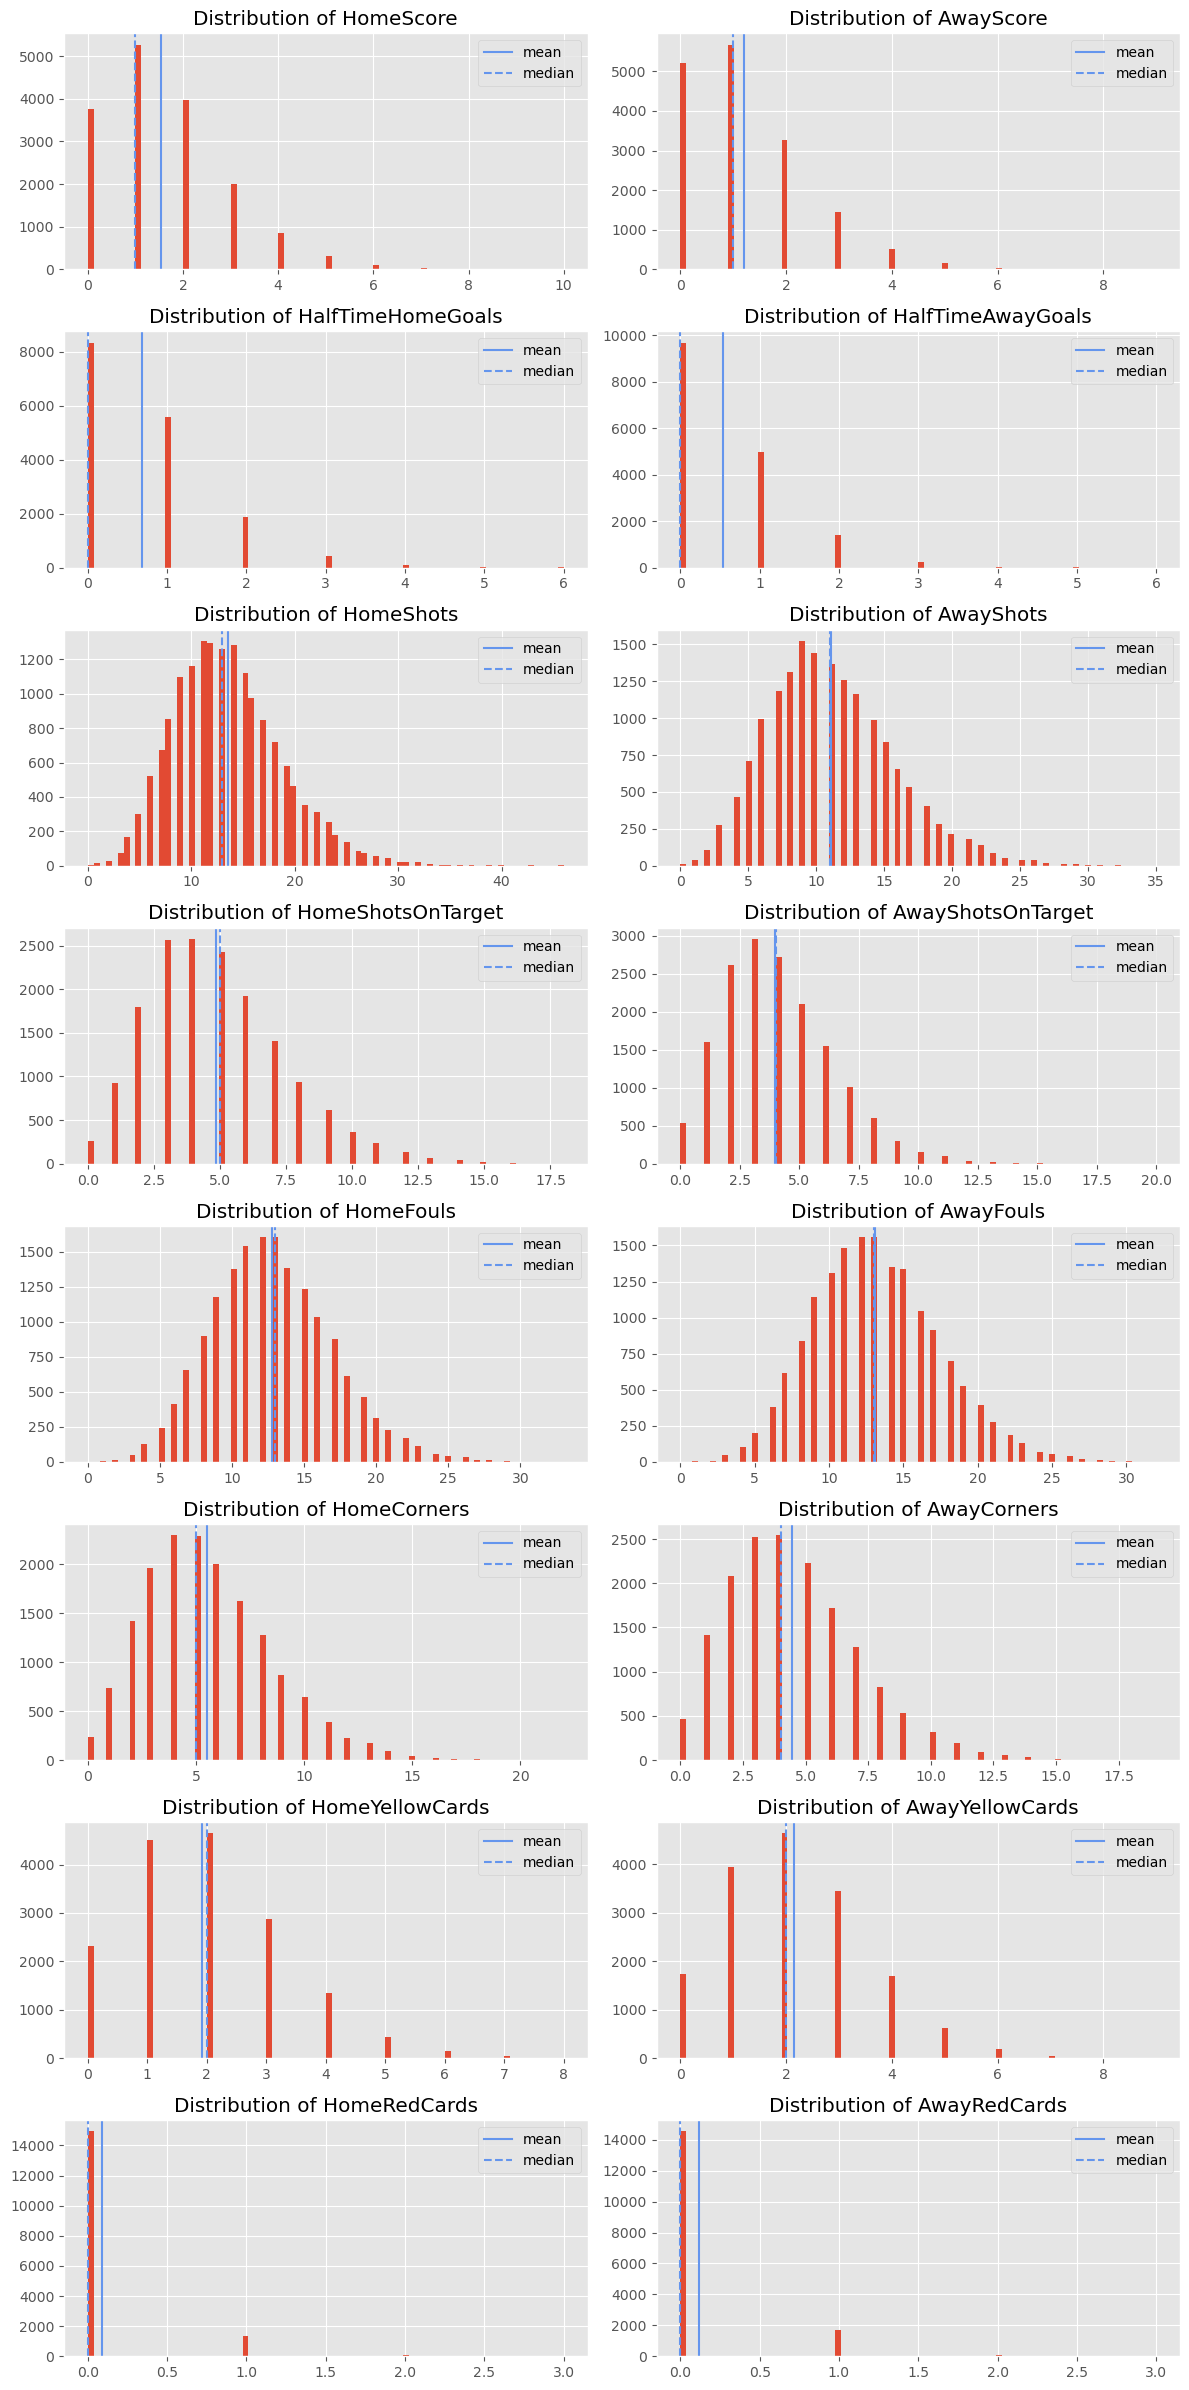

In [38]:
#changing the style of the plot
plt.style.use('ggplot')

# Create a figure with 8 rows and 2 columns
fig, axs = plt.subplots(8, 2, figsize=(12, 24))

# Plot numeric columns in each subplot
for i, column in enumerate(data1.select_dtypes("number").columns):
    row = i // 2
    col = i % 2
    
    axs[row, col].hist(data1[column], bins=80)
    axs[row, col].axvline(data1[column].mean(), 0, 1000, label="mean", color="cornflowerblue")
    axs[row, col].axvline(data1[column].median(), 0, 1000, label="median", color="cornflowerblue", linestyle="--")
    axs[row, col].set_title(f"Distribution of {column}")
    axs[row, col].legend()


plt.tight_layout()
plt.show()




## Visualizing Categoric Variables

In [39]:
#selecting object datatype
objects = data1.select_dtypes("object").columns
print(objects)

Index(['id', 'Country', 'League', 'Div', 'Season', 'HomeTeam', 'AwayTeam',
       'Result', 'HalfTimeResult'],
      dtype='object')


In [40]:
data1.head()

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
380,UosQupQqR78Yymt6SSexCa,England,Premier League,E0,2013-2014,2013-08-17,Arsenal,Aston Villa,1.0,3.0,...,4.0,4.0,15.0,18.0,4.0,3.0,4.0,5.0,1.0,0.0
381,oEnXpnDQgbiCdKo9G7CJKh,England,Premier League,E0,2013-2014,2013-08-17,Liverpool,Stoke,1.0,0.0,...,11.0,4.0,11.0,11.0,12.0,6.0,1.0,1.0,0.0,0.0
382,SZpDShsgFrwGbYZXPDwKkN,England,Premier League,E0,2013-2014,2013-08-17,Norwich,Everton,2.0,2.0,...,2.0,6.0,13.0,10.0,6.0,8.0,2.0,0.0,0.0,0.0
383,4vJAt769SfUzDtj4q63puW,England,Premier League,E0,2013-2014,2013-08-17,Sunderland,Fulham,0.0,1.0,...,3.0,1.0,14.0,14.0,6.0,1.0,0.0,3.0,0.0,0.0
384,nybcpgYg94pE9vTGDM5PMa,England,Premier League,E0,2013-2014,2013-08-17,Swansea,Man United,1.0,4.0,...,6.0,7.0,13.0,10.0,7.0,4.0,1.0,3.0,0.0,0.0


In [41]:
data1["Result"].unique()

array(['A', 'H', 'D'], dtype=object)

First let's look at the proportions of winning teams after 90 minutes and compare them to matches when the team is leading at half:

<div>
<img src="https://i.ibb.co/py3kCkC/RESULTS.jpg" width="800"/>
</div>

Let's take a look the most common teams in each league. We can group the data by `Home Team` since each team plays an even amount of home and away matches each season:

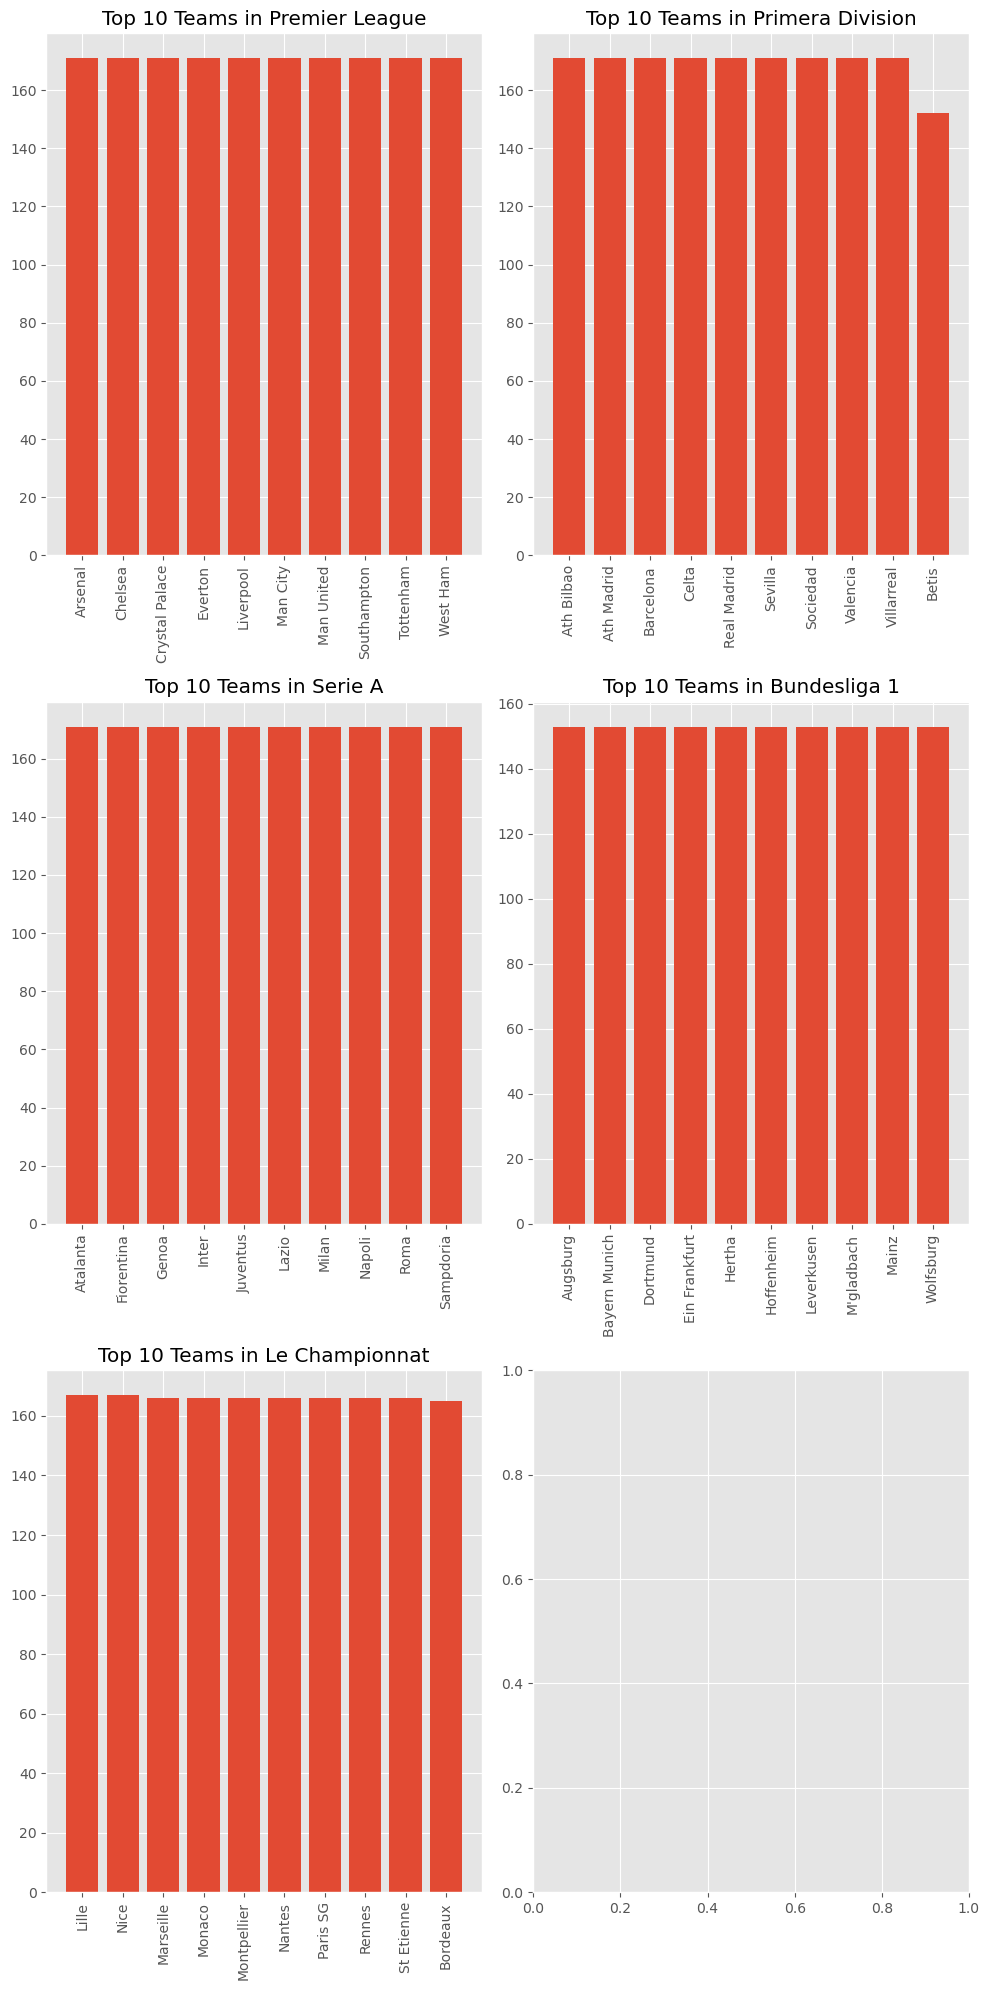

In [42]:
# Group data by league and count the number of occurrences of each team
league_counts = data1.groupby('League')['HomeTeam'].value_counts()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the top 10 teams
for i, league in enumerate(data1['League'].unique()):
    top_teams = league_counts[league].nlargest(10)
    axs[i//2, i%2].bar(top_teams.index, top_teams.values)
    axs[i//2, i%2].set_title(f'Top 10 Teams in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)



# Adjusting
plt.tight_layout()
plt.show()


As expected, the majority of the teams in each league are represented over 160 times.

Now let's take a look at which team's have won the most games when playing at home:

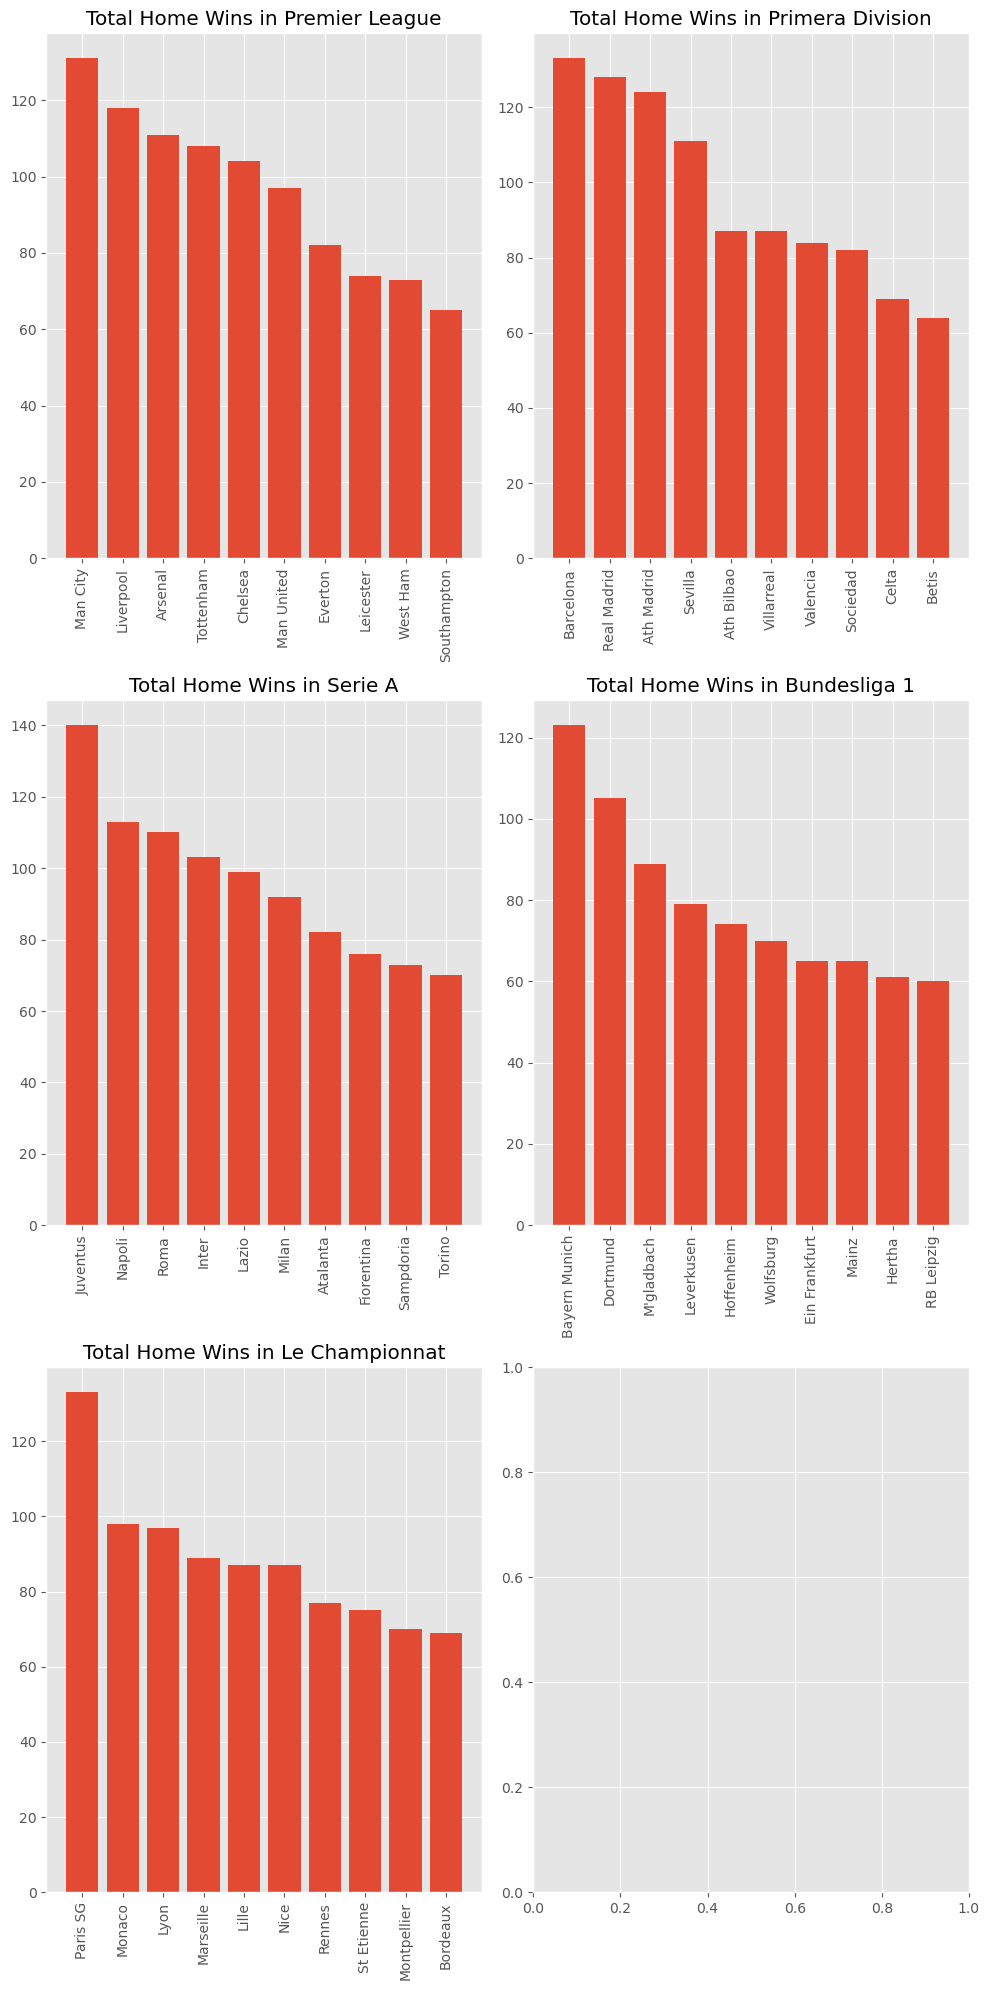

In [43]:
# Group data by league and team, and sum the number of wins
league_team_wins = data1[data1['Result'] == 'H'].groupby(['League', 'HomeTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(data1['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Home Wins in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

Which team's have won the most playing away:

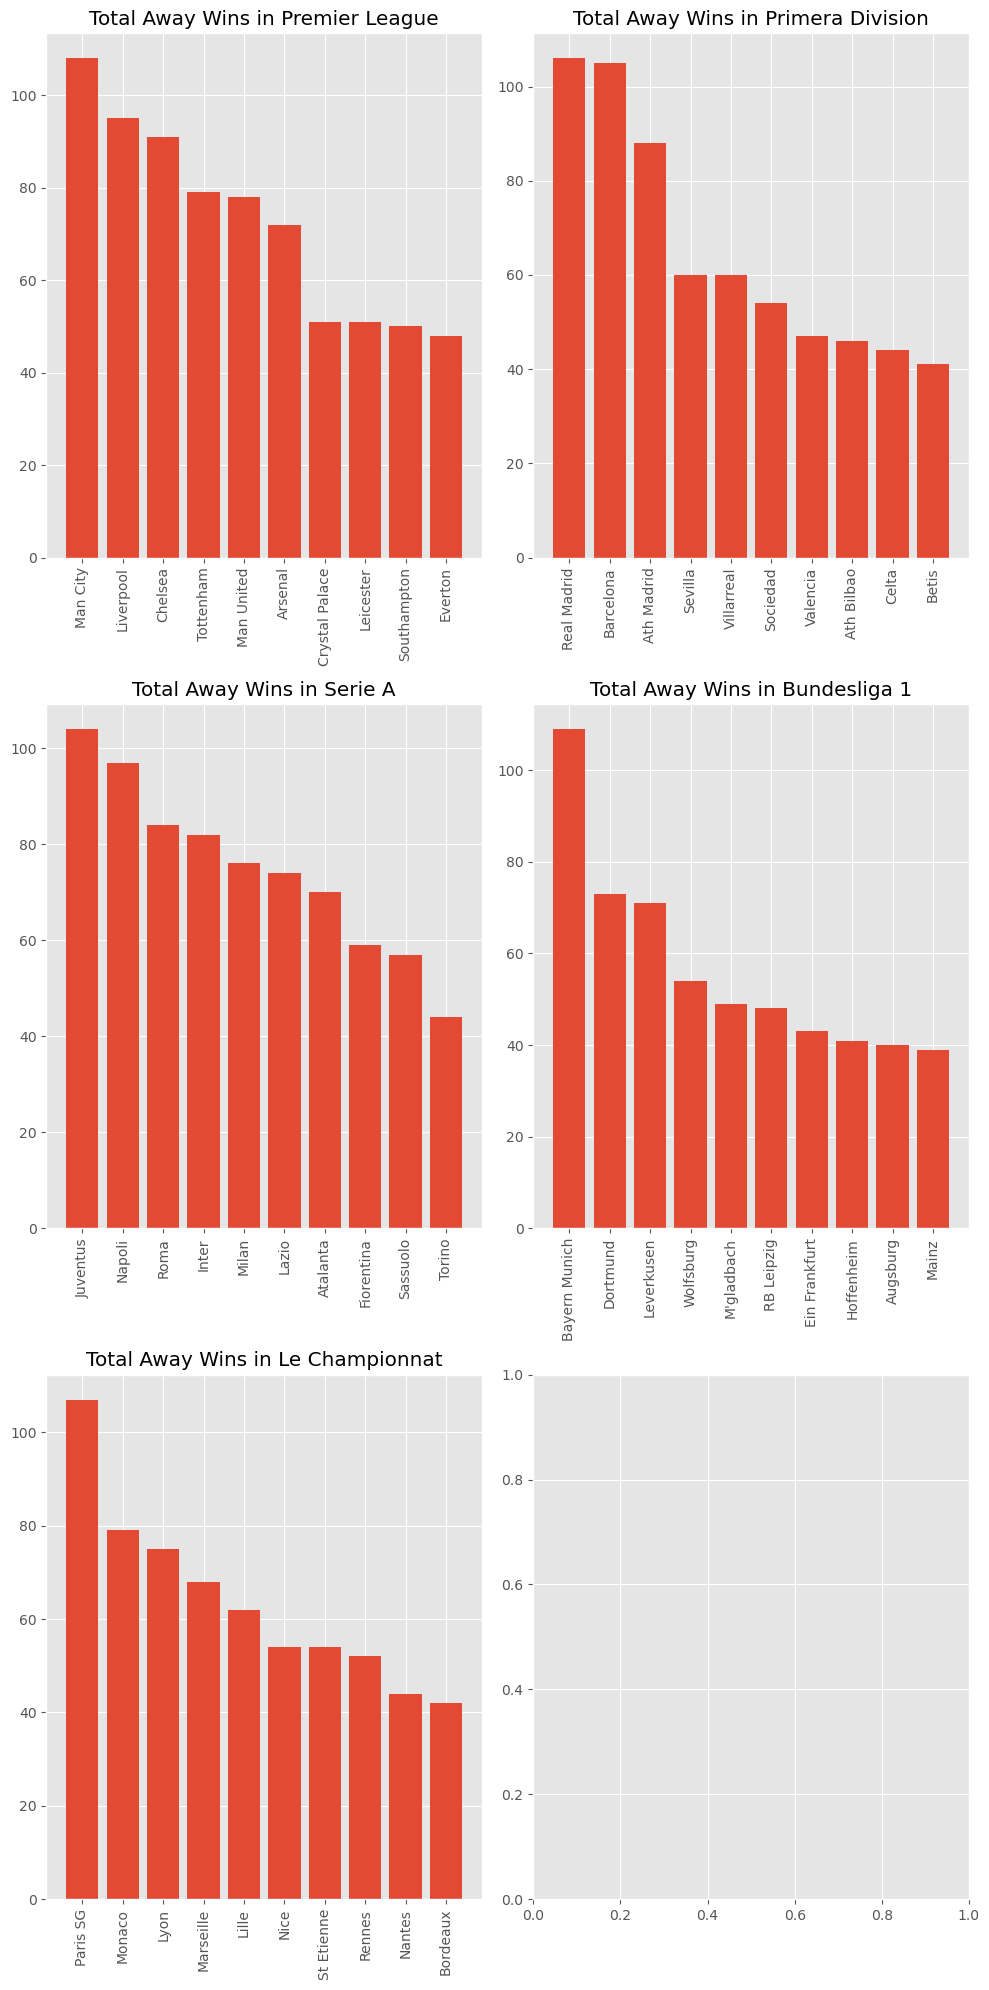

In [44]:
# Group data by league and team, and sum the number of wins
league_team_wins = data1[data1['Result'] == 'A'].groupby(['League', 'AwayTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(data1['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Away Wins in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

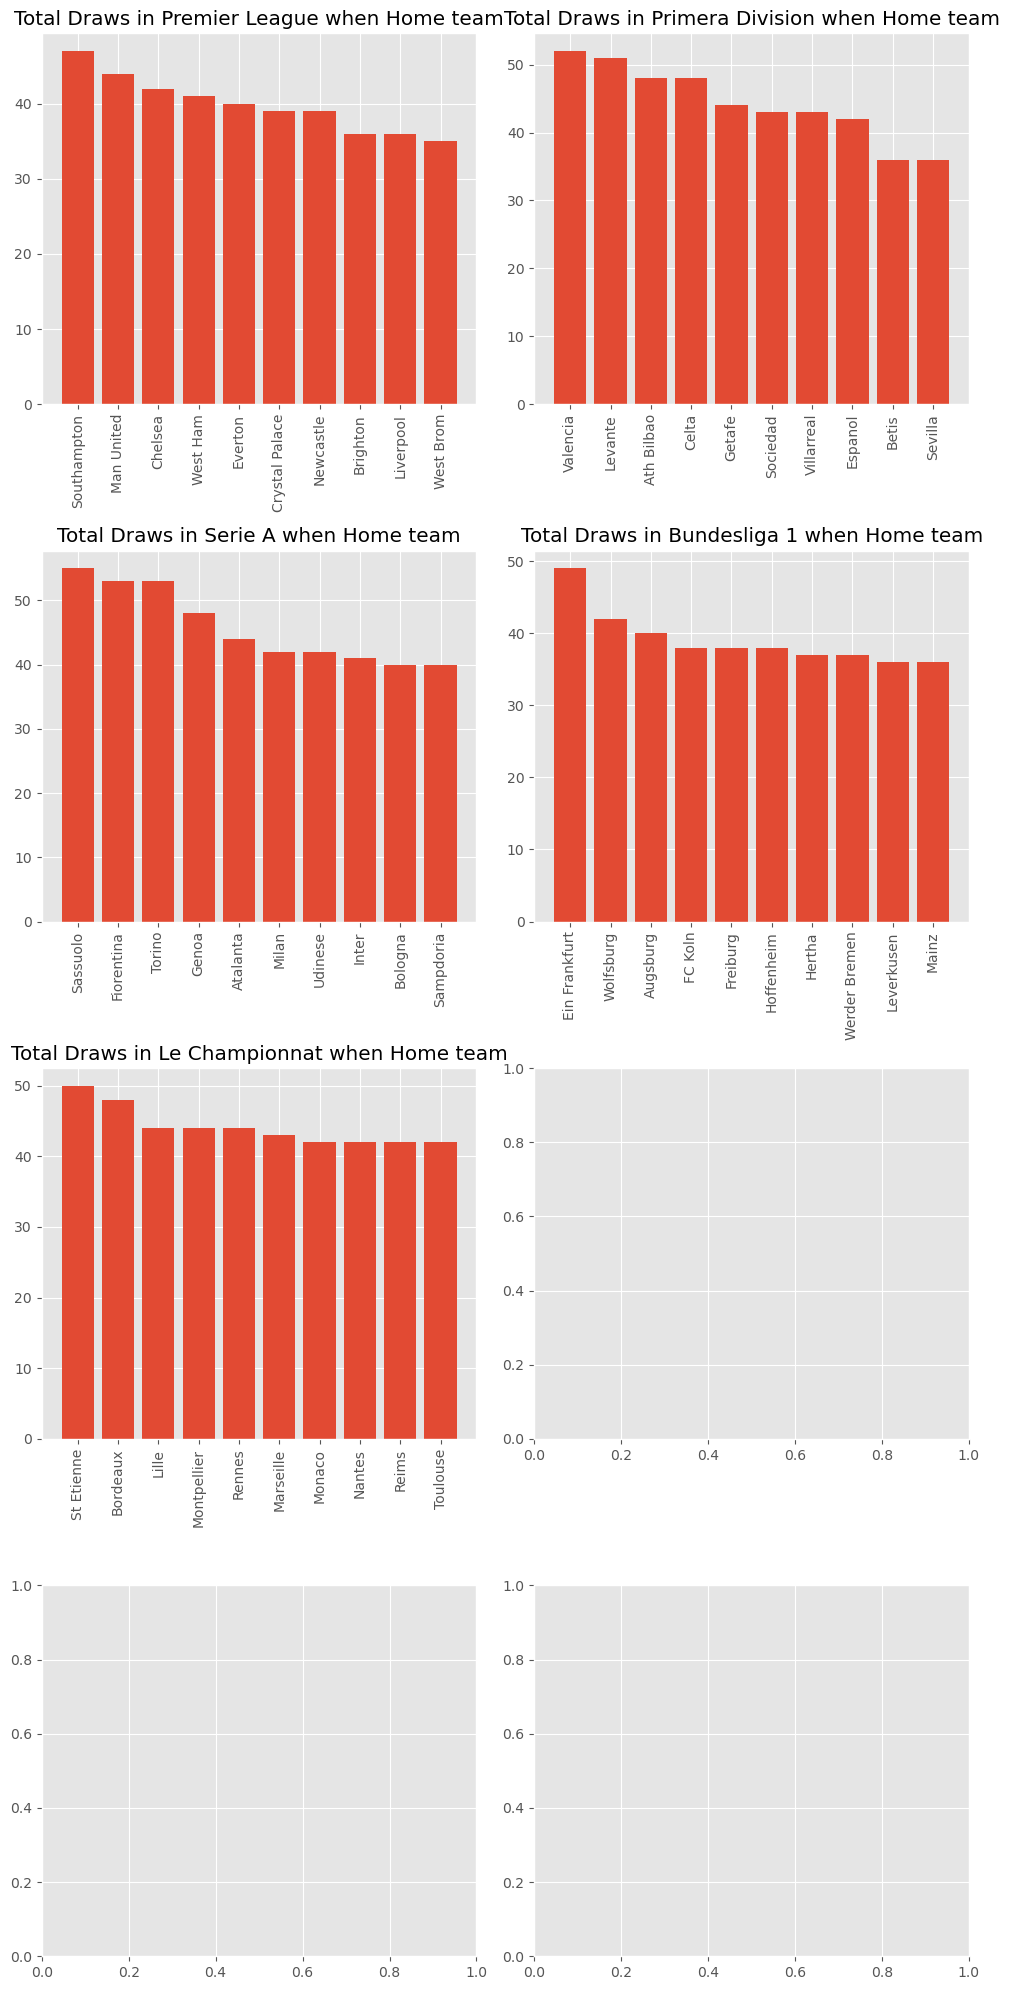

In [45]:
# Group data by league and team, and sum the number of wins
league_team_wins = data1[data1['Result'] == 'D'].groupby(['League', 'HomeTeam'])['Result'].count()

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(data1['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Draws in {league} when Home team')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

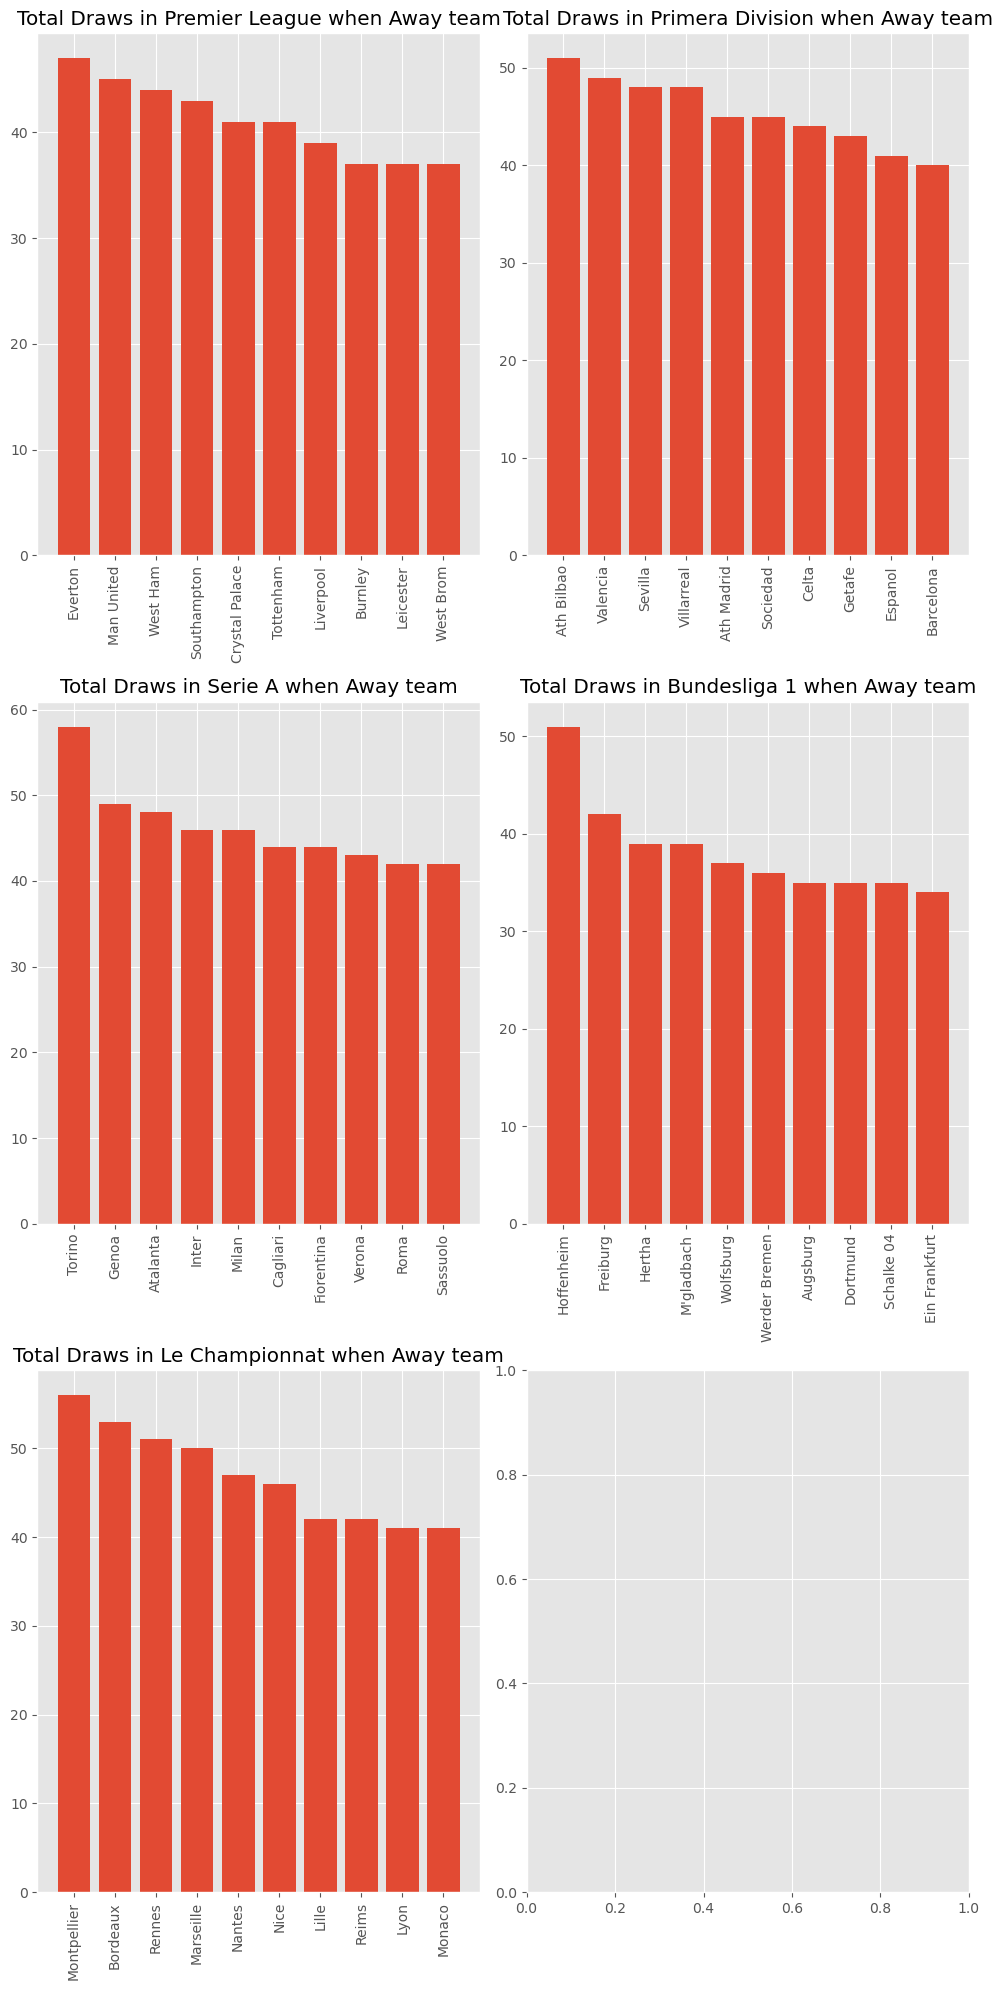

In [46]:
# Group data by league and team, and sum the number of wins
league_team_wins = data1[data1['Result'] == 'D'].groupby(['League', 'AwayTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(data1['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Draws in {league} when Away team')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)


# Adjusting the layout
plt.tight_layout()
plt.show()

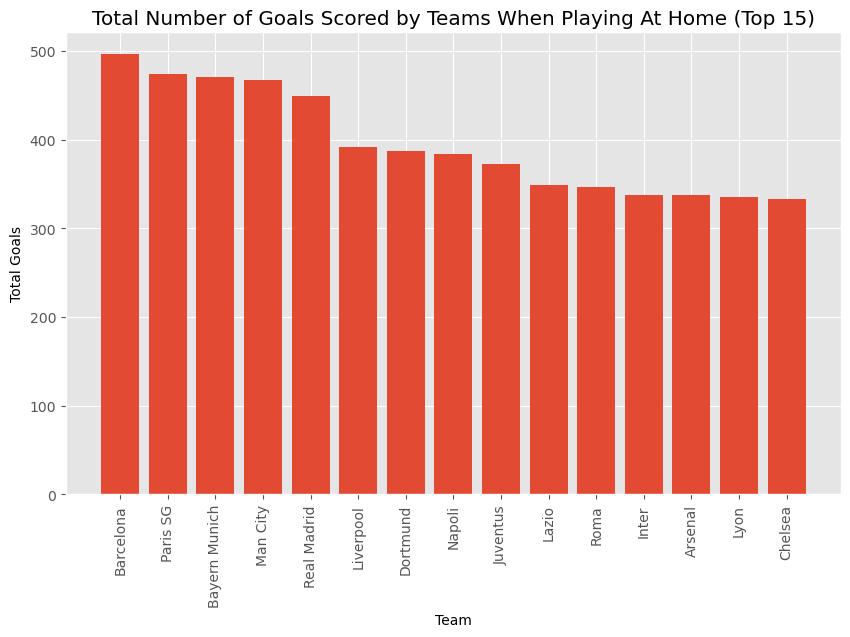

In [47]:
goals_df = data1.groupby('HomeTeam')['HomeScore'].sum().reset_index()
goals_df = goals_df.sort_values(by='HomeScore', ascending=False)
top30_df = goals_df.head(15)

plt.figure(figsize=(10, 6))
plt.bar(top30_df['HomeTeam'], top30_df['HomeScore'])
plt.title('Total Number of Goals Scored by Teams When Playing At Home (Top 15)')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [48]:
team_scores = data1.groupby('HomeTeam').agg({'HomeScore': 'sum'})
sorted_scores = team_scores.sort_values(by='HomeScore', ascending=False)
head = sorted_scores.head(15)
head.value_counts()
print(head)

               HomeScore
HomeTeam                
Barcelona          496.0
Paris SG           474.0
Bayern Munich      470.0
Man City           467.0
Real Madrid        449.0
Liverpool          391.0
Dortmund           387.0
Napoli             384.0
Juventus           372.0
Lazio              349.0
Roma               347.0
Inter              338.0
Arsenal            338.0
Lyon               335.0
Chelsea            333.0


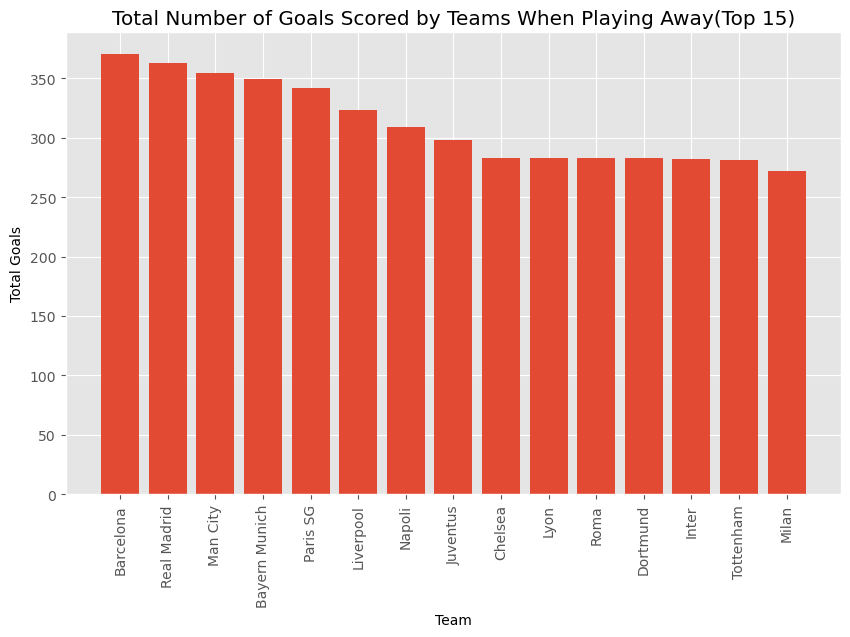

In [49]:
goals_df = data1.groupby('AwayTeam')['AwayScore'].sum().reset_index()
goals_df = goals_df.sort_values(by='AwayScore', ascending=False)
top30_df = goals_df.head(15)


plt.figure(figsize=(10, 6))
plt.bar(top30_df['AwayTeam'], top30_df['AwayScore'])
plt.title('Total Number of Goals Scored by Teams When Playing Away(Top 15)')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [50]:
team_scores = data1.groupby('AwayTeam').agg({'AwayScore': 'sum'})
sorted_scores = team_scores.sort_values(by='AwayScore', ascending=False)
head = sorted_scores.head(15)
head.value_counts()
print(head)

               AwayScore
AwayTeam                
Barcelona          370.0
Real Madrid        363.0
Man City           354.0
Bayern Munich      349.0
Paris SG           342.0
Liverpool          323.0
Napoli             309.0
Juventus           298.0
Chelsea            283.0
Lyon               283.0
Roma               283.0
Dortmund           283.0
Inter              282.0
Tottenham          281.0
Milan              272.0


# Data Wrangling

Let's drop unnecessary categories. We don't need the `id` category since we wont be using that for modeling as well as the `Div` category as 5 of our leagues are the top flights in their respective countries and this info won't be necessary for modeling.

In [51]:
data1.id.nunique()

16332

In [52]:
data1 = data1.drop('id', axis=1)

In [53]:
data1.Div.unique()

array(['E0', 'SP1', 'I1', 'D1', 'F1'], dtype=object)

In [54]:
data1 = data1.drop('Div', axis=1)

In [55]:
#selecting object datatype
objects = data1.select_dtypes("object").columns
print(objects)

Index(['Country', 'League', 'Season', 'HomeTeam', 'AwayTeam', 'Result',
       'HalfTimeResult'],
      dtype='object')


In [56]:
print(f"The countries in the dataset are: {data1.Country.unique()}")

print(f"The leagues in the dataset are: {data1.League.unique()}")

The countries in the dataset are: ['England' 'Spain' 'Italy' 'Germany' 'France']
The leagues in the dataset are: ['Premier League' 'Primera Division' 'Serie A' 'Bundesliga 1'
 'Le Championnat']


We can see that the Leagues and the Countries contain the same data, therefore we can drop the league since it conveys less general info.

In [57]:
data1 = data1.drop('League', axis=1)

In [58]:
data1.to_csv('Euro Football Cleaner.csv', index=False)

In [59]:
#making a copy of the clean data for further wrangling
clean_data = data1.copy()

## Extracting Date

Now let's extract the year, month, and day from the `Date` column. We will keep the `Date` for now for the feature engineering portion.

In [60]:
# extracting year
clean_data['Year'] = clean_data['Date'].dt.year

# extracting month
clean_data['Month'] = clean_data['Date'].dt.month
# extracting day
clean_data['Day'] = clean_data['Date'].dt.day

#dropping the date column
#clean_data.drop('Date', axis=1, inplace=True)

# checking results
clean_data.head()

,Country,Season,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,...,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Year,Month,Day
380,England,2013-2014,2013-08-17,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,...,18.0,4.0,3.0,4.0,5.0,1.0,0.0,2013,8,17
381,England,2013-2014,2013-08-17,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,...,11.0,12.0,6.0,1.0,1.0,0.0,0.0,2013,8,17
382,England,2013-2014,2013-08-17,Norwich,Everton,2.0,2.0,D,0.0,0.0,...,10.0,6.0,8.0,2.0,0.0,0.0,0.0,2013,8,17
383,England,2013-2014,2013-08-17,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,...,14.0,6.0,1.0,0.0,3.0,0.0,0.0,2013,8,17
384,England,2013-2014,2013-08-17,Swansea,Man United,1.0,4.0,A,0.0,2.0,...,10.0,7.0,4.0,1.0,3.0,0.0,0.0,2013,8,17


## Creating Dummy Variables with `HomeTeam`

In [61]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
HomeTeams = pd.DataFrame(clean_data['HomeTeam'])
encoded = ohe.fit_transform(HomeTeams)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#Adding "HomeTeam_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["HomeTeam_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping HomeTeam category
#clean_data = clean_data.drop(columns=['HomeTeam'])

## Creating Dummy Variables with `AwayTeam`

In [62]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
AwayTeams = pd.DataFrame(clean_data['AwayTeam'])
encoded = ohe.fit_transform(AwayTeams)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "AwayTeam_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["AwayTeam_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping AwayTeam category
#clean_data = clean_data.drop(columns=['AwayTeam'])

## Creating Dummy Variables for `Season`

In [63]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
Seasons = pd.DataFrame(clean_data['Season'])
encoded = ohe.fit_transform(Seasons)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "Season_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["Season_" + season for season in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping AwayTeam category
clean_data = clean_data.drop(columns=['Season'])

## Creating Dummy Variables for `Country`

In [64]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
Countries = pd.DataFrame(clean_data['Country'])
encoded = ohe.fit_transform(Countries)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "Country_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["Country_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping AwayTeam category
clean_data = clean_data.drop(columns=['Country'])

In [65]:
#selecting object datatype
objects = clean_data.select_dtypes("object").columns
print(objects)

Index(['HomeTeam', 'AwayTeam', 'Result', 'HalfTimeResult'], dtype='object')


In [66]:
clean_data.head()

,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2017-2018,Season_2018-2019,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain
0,2013-08-17,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,...,0,0,0,0,0,1,0,0,0,0
1,2013-08-17,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,...,0,0,0,0,0,1,0,0,0,0
2,2013-08-17,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,...,0,0,0,0,0,1,0,0,0,0
3,2013-08-17,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,...,0,0,0,0,0,1,0,0,0,0
4,2013-08-17,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,...,0,0,0,0,0,1,0,0,0,0


# Feature Engineering

## Creating `Form` Category

Let's create a couple of categories to signify the team's form, which will subtract the goals scored from goals conceded in the past 5 games. A team in good form will have a high positive value while a struggling team will have a negative value. This will allow our model to see which teams have been playing well or performing poorly in order to predict the current result.

We will do this by creating a function which calculates the scores from the past 5 games and updates them with the current match results. Since the form will only account for the last 5 matches, each team will start with 0. The form will be computed for both the home and away team in a dictionary, ensuring that each unique team has their own values. Afterwards, the rows will be run through the calculate_form function and two new categories will be created. Each unique team will have an ongoing form calculated whether they're playing at home or away.

In [67]:
def calculate_form(row):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    home_team_score = row['HomeScore'] - row['AwayScore']
    away_team_score = row['AwayScore'] - row['HomeScore']

    # Update the home_team_form_dict and away_team_form_dict with the current match result
    if home_team not in home_team_form_dict:
        home_team_form_dict[home_team] = [0] * 5
    home_team_form_dict[home_team].append(home_team_score)

    if away_team not in away_team_form_dict:
        away_team_form_dict[away_team] = [0] * 5
    away_team_form_dict[away_team].append(away_team_score)

    # Compute the home team form and away team form for the current match
    home_team_form = sum(home_team_form_dict[home_team][-5:])
    away_team_form = sum(away_team_form_dict[away_team][-5:])

    # If the team has played less than 2 match, set the form to 0
    if len(home_team_form_dict[home_team]) < 2:
        home_team_form = 0
    if len(away_team_form_dict[away_team]) < 2:
        away_team_form = 0

    return home_team_form, away_team_form

# Initialize the home_team_form_dict and away_team_form_dict with 0s for each team
home_team_form_dict = {team: [] for team in clean_data['HomeTeam'].unique()}
away_team_form_dict = {team: [] for team in clean_data['AwayTeam'].unique()}

# Create two new columns "HomeTeamForm" and "AwayTeamForm" containing the form for each team
clean_data[['HomeTeamForm', 'AwayTeamForm']] = clean_data.apply(lambda row: pd.Series(calculate_form(row)), axis=1)

In [68]:
clean_data.tail()

,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain,HomeTeamForm,AwayTeamForm
16327,2022-05-21,Lorient,Troyes,1.0,1.0,D,0.0,1.0,A,17.0,...,0,0,1,0,1,0,0,0,1.0,-2.0
16328,2022-05-21,Marseille,Strasbourg,4.0,0.0,H,1.0,0.0,H,17.0,...,0,0,1,0,1,0,0,0,5.0,-4.0
16329,2022-05-21,Nantes,St Etienne,1.0,1.0,D,1.0,0.0,H,12.0,...,0,0,1,0,1,0,0,0,2.0,-8.0
16330,2022-05-21,Paris SG,Metz,5.0,0.0,H,3.0,0.0,H,27.0,...,0,0,1,0,1,0,0,0,10.0,-13.0
16331,2022-05-21,Reims,Nice,2.0,3.0,A,2.0,0.0,H,5.0,...,0,0,1,0,1,0,0,0,-3.0,-3.0


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = clean_data.drop(['Result', 'HalfTimeResult', 'HomeScore', 'AwayScore', "Date", "HomeTeam", "AwayTeam"], axis=1) # Select features except target variable
y = clean_data['Result'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_val, X_remainder, y_val, y_remainder = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

score = logreg.score(X_val, y_val)
print("Accuracy on validation set: {:.2f}%".format(score * 100))

y_pred_remainder = logreg.predict(X_remainder)

score_remainder = logreg.score(X_remainder, y_remainder)
print("Accuracy on remainder set: {:.2f}%".format(score_remainder * 100))

Accuracy on validation set: 69.10%
Accuracy on remainder set: 67.59%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
y_test_predict = logreg.predict(X_val)
score_test = logreg.score(X_test, y_test)
print("Accuracy on remainder set: {:.2f}%".format(score_test * 100))

Accuracy on remainder set: 68.35%


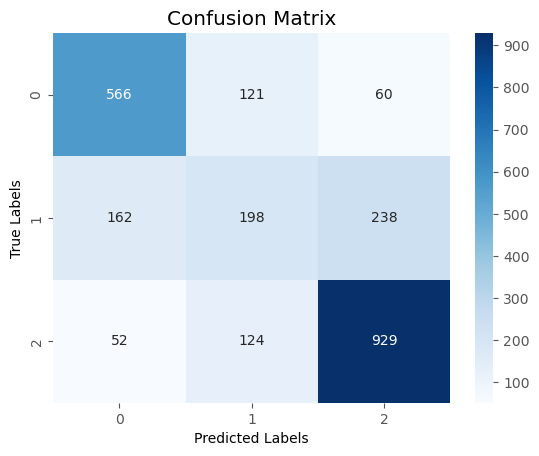

              precision    recall  f1-score   support

           A       0.73      0.76      0.74       747
           D       0.45      0.33      0.38       598
           H       0.76      0.84      0.80      1105

    accuracy                           0.69      2450
   macro avg       0.64      0.64      0.64      2450
weighted avg       0.67      0.69      0.68      2450



In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#setting up and displaying confusion matrix
cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_val, y_pred))